## Imports

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Results

In [2]:
def fetch_results(path, model):
    table = pd.read_csv(path)
    table['Model'] = model
    return table

In [3]:
gpt4_ft = fetch_results("DATA/gpt_4_turbo_w_break_full_table_20240928-102819/scores_embed_100.csv", "GPT4-Turbo")
gpt4o_ft = fetch_results("DATA/gpt_4o_full_table_20240727-211636/scores_embed_100.csv", "GPT-4o")
llama70b_ft = fetch_results("DATA/Meta_Llama_3.1_70B_Instruct_full_table_20240726-231535/scores_embed_100.csv", "LLaMa3.1_70b")
llama405b_ft = fetch_results("DATA/Meta_Llama_3.1_405B_Instruct_full_table_20240908-111922/scores_embed_100.csv", "LLaMa3.1_405b")

In [4]:
with open("DATA/Benchmark/cfg.json") as f:
    metadata = json.load(f)

## Calc Scores

In [5]:
def calc_scores(results):
    keys_f1_scores = [[], [], [], []]
    non_keys_f1_scores = [[], [], [], []]
    f1_scores = [[], [], [], []]

    for row in results.iloc[:100].itertuples():
        keys_f1_score = row.Keys_F1_Score
        non_keys_f1_score = row.Non_Keys_F1_Score
        f1_score = row.F1_Score
        
        num_non_keys = len(metadata["%d" % row.Index]['columns']) - len(metadata["%d" % row.Index]['keys'])
        numeric_ratio = len(metadata["%d" % row.Index]['numericNonKeys'])/num_non_keys

        if numeric_ratio == 0.0:
            keys_f1_scores[0].append(keys_f1_score)
            non_keys_f1_scores[0].append(non_keys_f1_score)
            f1_scores[0].append(f1_score)
        elif numeric_ratio <= 0.67:  
            keys_f1_scores[1].append(keys_f1_score)
            non_keys_f1_scores[1].append(non_keys_f1_score)
            f1_scores[1].append(f1_score)
        elif numeric_ratio < 1.0:  
            keys_f1_scores[2].append(keys_f1_score)
            non_keys_f1_scores[2].append(non_keys_f1_score)
            f1_scores[2].append(f1_score)
        else:   
            keys_f1_scores[3].append(keys_f1_score)
            non_keys_f1_scores[3].append(non_keys_f1_score)
            f1_scores[3].append(f1_score)
            
    return [np.mean(scores) for scores in keys_f1_scores],\
           [np.mean(scores) for scores in non_keys_f1_scores],\
           [np.mean(scores) for scores in f1_scores]  

In [6]:
gpt4_keys, gpt4_non_keys, gpt4_overall = calc_scores(gpt4_ft)
gpt4o_keys, gpt4o_non_keys, gpt4o_overall = calc_scores(gpt4o_ft)
llama70b_keys, llama70b_non_keys, llama70b_overall = calc_scores(llama70b_ft)
llama405b_keys, llama405b_non_keys, llama405b_overall = calc_scores(llama405b_ft)

## Plot

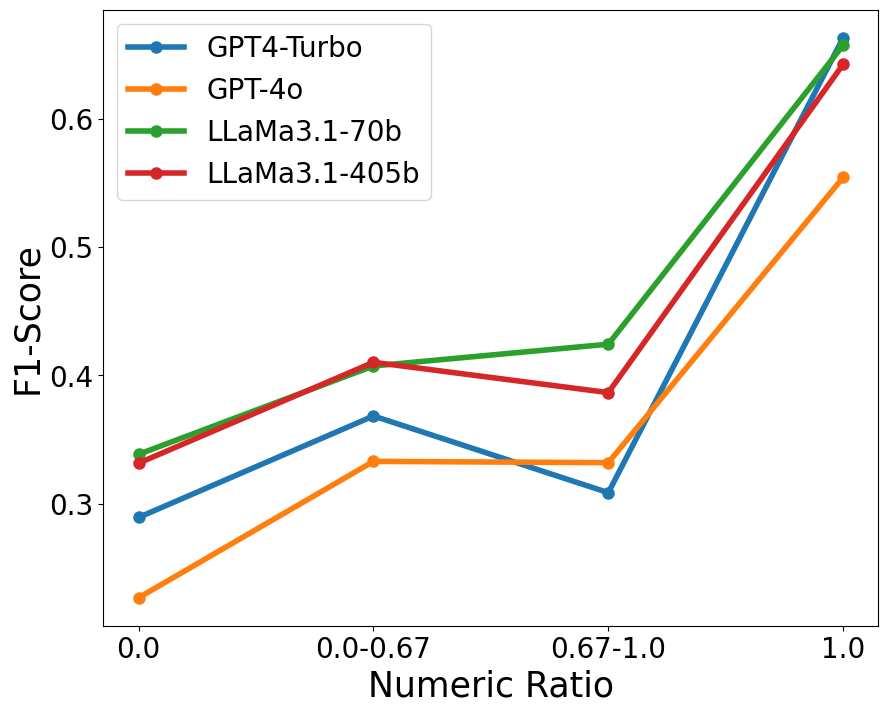

In [7]:
plt.figure(figsize=(10,8))

plt.plot(gpt4_keys, label="GPT4-Turbo", linewidth=4, marker=".", markersize=16)
plt.plot(gpt4o_keys, label="GPT-4o", linewidth=4, marker=".", markersize=16)
plt.plot(llama70b_keys, label="LLaMa3.1-70b", linewidth=4, marker=".", markersize=16)
plt.plot(llama405b_keys, label="LLaMa3.1-405b", linewidth=4, marker=".", markersize=16)

plt.xlabel("Numeric Ratio", fontsize=25)
plt.ylabel("F1-Score", fontsize=25)
plt.xticks(np.arange(0, 4, step=1), labels=['0.0', '0.0-0.67', '0.67-1.0', '1.0'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc=2, prop={'size': 20})
plt.savefig("RES_CHARTS/numeric_ratio_keys_f1_score.pdf", format="pdf")
plt.show()

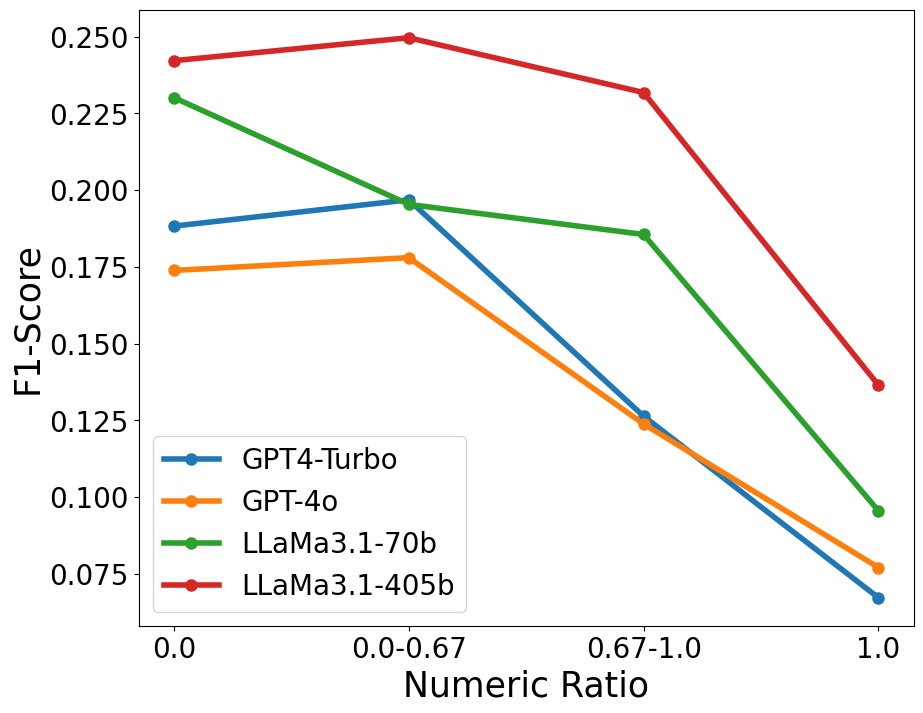

In [10]:
plt.figure(figsize=(10,8))

plt.plot(gpt4_non_keys, label="GPT4-Turbo", linewidth=4, marker=".", markersize=16)
plt.plot(gpt4o_non_keys, label="GPT-4o", linewidth=4, marker=".", markersize=16)
plt.plot(llama70b_non_keys, label="LLaMa3.1-70b", linewidth=4, marker=".", markersize=16)
plt.plot(llama405b_non_keys, label="LLaMa3.1-405b", linewidth=4, marker=".", markersize=16)

plt.xlabel("Numeric Ratio", fontsize=25)
plt.ylabel("F1-Score", fontsize=25)
plt.xticks(np.arange(0, 4, step=1), labels=['0.0', '0.0-0.67', '0.67-1.0', '1.0'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc=3, prop={'size': 20})
plt.savefig("RES_CHARTS/numeric_ratio_non_keys_f1_score.pdf", format="pdf")
plt.show()

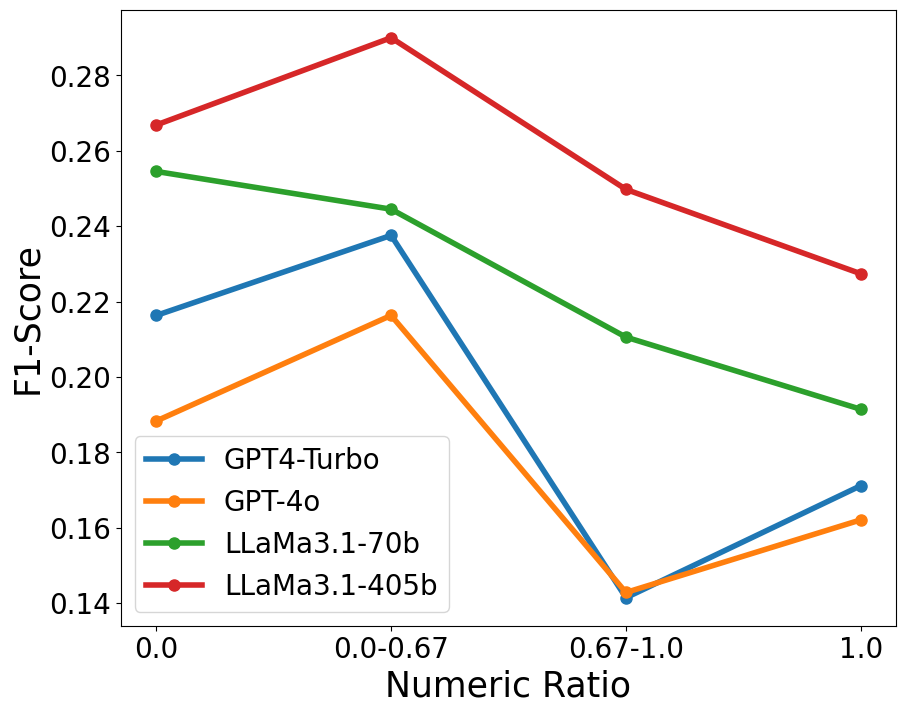

In [11]:
plt.figure(figsize=(10,8))

plt.plot(gpt4_overall, label="GPT4-Turbo", linewidth=4, marker=".", markersize=16)
plt.plot(gpt4o_overall, label="GPT-4o", linewidth=4, marker=".", markersize=16)
plt.plot(llama70b_overall, label="LLaMa3.1-70b", linewidth=4, marker=".", markersize=16)
plt.plot(llama405b_overall, label="LLaMa3.1-405b", linewidth=4, marker=".", markersize=16)

plt.xlabel("Numeric Ratio", fontsize=25)
plt.ylabel("F1-Score", fontsize=25)
plt.xticks(np.arange(0, 4, step=1), labels=['0.0', '0.0-0.67', '0.67-1.0', '1.0'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc=3, prop={'size': 20})
plt.savefig("RES_CHARTS/numeric_ratio_f1_score.pdf", format="pdf")
plt.show()